# 1 Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 2 Load Dataset

In [2]:
medical_df=pd.read_csv("D:\\python odyssey\\day8\\kmeans\\heart_dataset_mini.csv")
medical_df

,age,sex,chol
0,63,1,233
1,37,1,250
2,41,0,204
3,56,1,236
4,57,0,354
...,...,...,...
298,57,0,241
299,45,1,264
300,68,1,193
301,57,1,131


In [3]:
X=medical_df[["age","chol"]]
X

,age,chol
0,63,233
1,37,250
2,41,204
3,56,236
4,57,354
...,...,...
298,57,241
299,45,264
300,68,193
301,57,131


In [4]:
X.isnull().sum()

age     0
chol    0
dtype: int64

In [5]:
X.describe()

,age,chol
count,303.000000,303.000000
mean,54.366337,246.264026
std,9.082101,51.830751
min,29.000000,126.000000
25%,47.500000,211.000000
50%,55.000000,240.000000
75%,61.000000,274.500000
max,77.000000,564.000000


# 3. Visualize the features 

Text(0, 0.5, 'age')

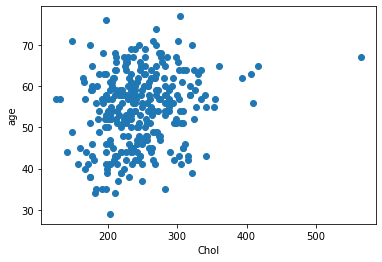

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X.chol,X.age)
plt.xlabel("Chol")
plt.ylabel("age")

# 4 Scale the feature values 

In [7]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 9.52196602e-01, -2.56333707e-01],
       [-1.91531289e+00,  7.21994916e-02],
       [-1.47415758e+00, -8.16772694e-01],
       [ 1.80174816e-01, -1.98357261e-01],
       [ 2.90463642e-01,  2.08204965e+00],
       [ 2.90463642e-01, -1.04867848e+00],
       [ 1.80174816e-01,  9.22520713e-01],
       [-1.14329110e+00,  3.23430762e-01],
       [-2.60980491e-01, -9.13400106e-01],
       [ 2.90463642e-01, -1.51249006e+00],
       [-4.04028375e-02, -1.40380814e-01],
       [-7.02135797e-01,  5.55336549e-01],
       [-5.91846970e-01,  3.81407208e-01],
       [ 1.06248543e+00, -6.81494318e-01],
       [ 4.00752469e-01,  7.09940408e-01],
       [-4.81558144e-01, -5.26890460e-01],
       [ 4.00752469e-01,  1.81149290e+00],
       [ 1.28306308e+00, -3.91612084e-01],
       [-1.25357993e+00,  1.42230447e-02],
       [ 1.61392956e+00, -1.40380814e-01],
       [ 5.11041295e-01, -2.37008225e-01],
       [-1.14329110e+00, -2.56333707e-01],
       [-1.36386876e+00, -3.91612084e-01],
       [ 7.

# 5 fit Model for Different K 

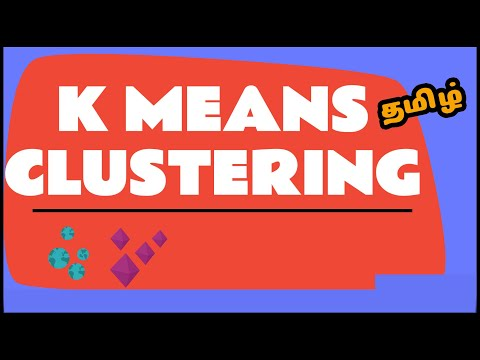

In [8]:
from IPython.display import YouTubeVideo

YouTubeVideo('8luMuQJyxdc', width=400, height=200)




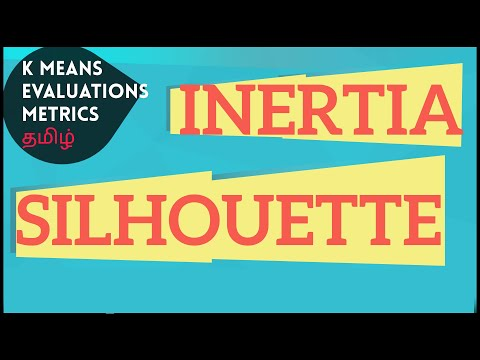

In [9]:
YouTubeVideo('Kmrxc3NpNtQ', width=400, height=200)

In [10]:
list(range(2,12))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [11]:

model_labels={}
centroids={}
i_score=[]
s_score=[]
for k in range(2,12):
    #model building
    model=KMeans(n_clusters=k)
    #model fit 
    model=model.fit(X)
    
    # get the output labels
    labels=model.labels_
    model_labels[k]=labels
    
    #inertia
    i_score.append(model.inertia_)
    
    #silhouette
    s_score.append(silhouette_score(X,labels))
    
    #centroids
    centroids[k]=model.cluster_centers_
    
    print(f"---- inertia {model.inertia_} silhoutte {silhouette_score(X,labels)}")
    

---- inertia 375.14224818605464 silhoutte 0.35642725100730843
---- inertia 256.9598573689617 silhoutte 0.3603326502768412
---- inertia 207.3588011627035 silhoutte 0.34256800544161103
---- inertia 165.2567106271851 silhoutte 0.351113055666146
---- inertia 138.3244614208023 silhoutte 0.3556814561758239
---- inertia 118.25985139788774 silhoutte 0.3525461911915897
---- inertia 105.34245769394377 silhoutte 0.3378717416607325
---- inertia 92.3009997241576 silhoutte 0.3592517442383332
---- inertia 81.78131322337609 silhoutte 0.3526927917769282
---- inertia 75.32536663369663 silhoutte 0.34678236946104796


# 6 Plot the inertia and Silhouette score

Text(0.5, 0, 'K')

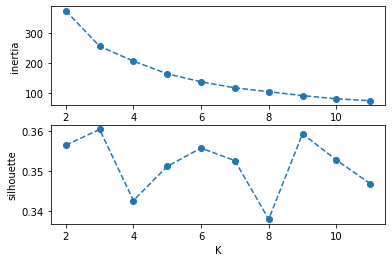

In [12]:
fig,ax=plt.subplots(2,1,sharex=True)
plt.subplot(211) #row,solumn,plot
plt.plot(range(2,12),i_score,"o--")
plt.ylabel("inertia")

plt.subplot(212) #row,solumn,plot
plt.plot(range(2,12),s_score,"o--")
plt.ylabel("silhouette")
plt.xlabel("K")


# 7 Get the cluster label of the best model and plot the clusters 

In [13]:
K_labels=model_labels[3]

In [14]:
k_centroid=centroids[3]

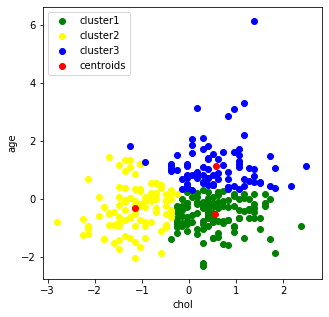

In [49]:
fig,ax=plt.subplots(figsize=(5,5))
# 1st cluster
plt.scatter(X[K_labels == 0,0],X[K_labels == 0,1],c="green",label="cluster1")
#2nd cluster
plt.scatter(X[K_labels == 1,0],X[K_labels == 1,1],c="yellow",label="cluster2")
#3rd cluster
plt.scatter(X[K_labels == 2,0],X[K_labels == 2,1],c="blue",label="cluster3")
#3 cluster centroids
plt.scatter(k_centroid[:,0],k_centroid[:,1],c="r",label="centroids")
plt.xlabel("chol")
plt.ylabel("age")



In [16]:
analysis=medical_df[["age","chol"]].copy()
analysis

,age,chol
0,63,233
1,37,250
2,41,204
3,56,236
4,57,354
...,...,...
298,57,241
299,45,264
300,68,193
301,57,131


In [17]:
analysis["label"]=K_labels
analysis

,age,chol,label
0,63,233,0
1,37,250,1
2,41,204,1
3,56,236,0
4,57,354,2
...,...,...,...
298,57,241,0
299,45,264,1
300,68,193,0
301,57,131,0


In [18]:
analysis.groupby("label")["age","chol"].mean()

,age,chol
label,,
0,59.470588,218.285714
1,43.920000,230.530000
2,59.571429,304.630952


# Prediction 

In [61]:
import numpy as np
person_01=np.array([[30,150]])
person_01

array([[ 30, 150]])

In [62]:
person_01=scaler.transform(person_01)
person_01

array([[-2.68733467, -1.86034874]])

In [65]:
model=KMeans(n_clusters=3)
#model fit 
model=model.fit(X)

In [66]:
model.predict(person_01)

array([2])

In [ ]:
0- 1st cluster ,1-2nd cluster ,2 - 3rd cluster 
